## Installation and GUI 

https://scqubits.readthedocs.io/en/latest/installation.html#

In [1]:
# pip install scqubits -U

In [2]:
# import scqubits.testing as sctest
# sctest.run()

In [3]:
import scqubits
scqubits.set_units('GHz') #setting units since it defaulted to 'MHz'
scqubits.GUI()

Container(children=[Sheet(children=[Card(children=[Img(layout=None, src='data:image/png;base64,iVBORw0KGgoAAAA…

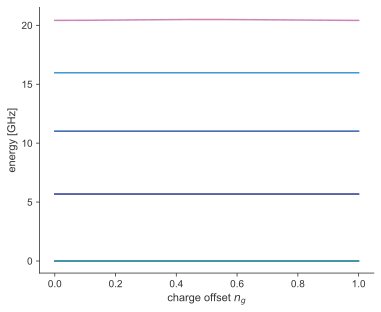

In [4]:
fig, ax = scqubits.GUI.fig_ax
ax.set_xlabel(r"charge offset $n_g$")
fig

## Basics


In [5]:
transmon = scqubits.Transmon(
    EJ=30.0,
    EC=1.2,
    ng=0.3,
    ncut=31
)

In [6]:
transmon

Transmon(**{'EJ': 30.0, 'EC': 1.2, 'ng': 0.3, 'ncut': 31, 'truncated_dim': 6, 'id_str': 'Transmon_2', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None})

In [7]:
tmon = scqubits.Transmon.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

In [8]:
scqubits.get_units()

'GHz'

## Energy Spectrum

In [9]:
transmon.eigenvals(evals_count=12)

array([-21.82665096,  -6.1637235 ,   8.0193175 ,  20.04763559,
        30.53712535,  38.70154385,  54.55166998,  67.49080961,
        90.05007774, 107.1126152 , 135.67738991, 156.68121682])

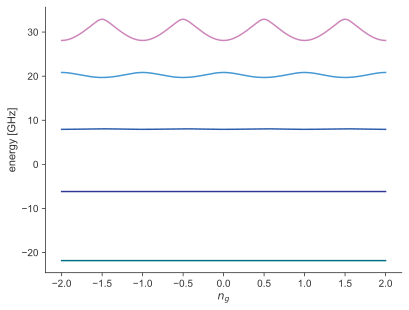

In [10]:
import numpy as np

ng_list = np.linspace(-2, 2, 220)
transmon.plot_evals_vs_paramvals('ng', ng_list, evals_count=5, subtract_ground=False); #this semicolon is to suppress the output of the last line

In [11]:
evals, evecs = transmon.eigensys()

In [12]:
evals

array([-21.82665096,  -6.1637235 ,   8.0193175 ,  20.04763559,
        30.53712535,  38.70154385])

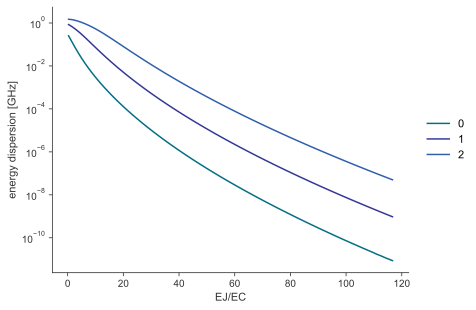

In [13]:
EJvals = np.linspace(0.1, 35, 100)
tmon.plot_dispersion_vs_paramvals('ng', 'EJ', EJvals, ref_param='EC', levels=(0,1,2));

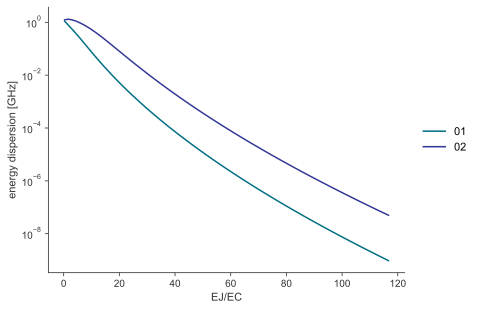

In [14]:
EJvals = np.linspace(0.1, 35, 100)
tmon.plot_dispersion_vs_paramvals('ng', 'EJ', EJvals, ref_param='EC', transitions=(((0,1), (0,2))));

## Wavefunctions

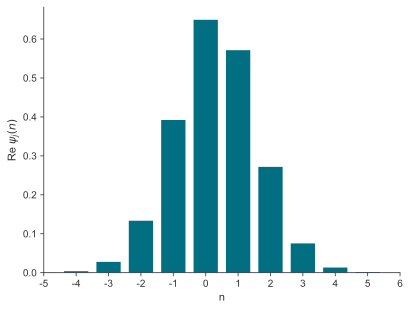

In [15]:
transmon.plot_n_wavefunction(esys=None, which=0, mode='real');

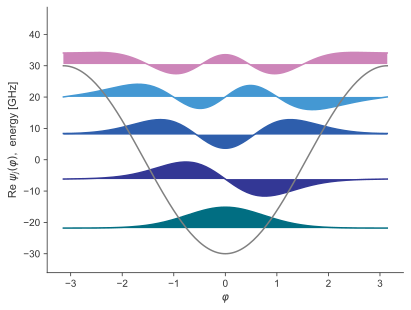

In [16]:
transmon.plot_phi_wavefunction(esys=None, which=[0,1,2,3,4], mode='real');

## Qubits

### Transmon

In [17]:
transmon = scqubits.Transmon(EJ=30.02,
                              EC=1.2,
                              ng=0.3,
                              ncut=31)

In [18]:
transmon = scqubits.Transmon.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

In [19]:
tune_tmon = scqubits.TunableTransmon(
   EJmax=50.0,
   EC=0.5,
   d=0.01,
   flux=0.0,
   ng=0.0,
   ncut=30
)

In [20]:
tune_tmon.t1_effective(noise_channels=['t1_charge_impedance',
                        't1_flux_bias_line'],
                        common_noise_options=dict(T=0.050))

0.07048149517266065

### FLuxonium

In [21]:
fluxonium = scqubits.Fluxonium(EJ = 8.9,
                               EC = 2.5,
                               EL = 0.5,
                               flux = 0.33,
                               cutoff = 110)

In [22]:
fluxonium = scqubits.Fluxonium.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

### Flux Qubit

In [23]:
EJ = 35.0
alpha = 0.6
fluxqubit = scqubits.FluxQubit(EJ1 = EJ,
                              EJ2 = EJ,
                              EJ3 = alpha*EJ,
                              ECJ1 = 1.0,
                              ECJ2 = 1.0,
                              ECJ3 = 1.0/alpha,
                              ECg1 = 50.0,
                              ECg2 = 50.0,
                              ng1 = 0.0,
                              ng2 = 0.0,
                              flux = 0.5,
                              ncut = 10)

In [24]:
fluxqubit = scqubits.FluxQubit.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

### Zero pi

In [25]:
phi_grid = scqubits.Grid1d(-6*np.pi, 6*np.pi, 200)

zero_pi = scqubits.ZeroPi(grid = phi_grid,
                           EJ   = 0.25,
                           EL   = 10.0**(-2),
                           ECJ  = 0.5,
                           EC   = None,
                           ECS  = 10.0**(-3),
                           ng   = 0.1,
                           flux = 0.23,
                           ncut = 30)

In [26]:
zero_pi = scqubits.ZeroPi.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

### FullZeroPi

In [27]:
phi_grid = scqubits.Grid1d(-6*np.pi, 6*np.pi, 200)

zero_pi = scqubits.FullZeroPi(grid = phi_grid,
                             EJ   = 0.25,
                             EL   = 10.0**(-2),
                             ECJ  = 0.5,
                             EC   = 0.001,
                             dEJ  = 0.05,
                             dCJ  = 0.05,
                             dEL  = 0.01,
                             dC   = 0.08,
                             ng   = 0.1,
                             flux = 0.23,
                             ncut = 30,
                             zeropi_cutoff = 10,
                             zeta_cutoff = 30)

In [28]:
zero_pi = scqubits.FullZeroPi.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

### Cos 2phi

In [29]:
cos2phi_qubit = scqubits.Cos2PhiQubit(EJ = 15.0,
                                      ECJ = 2.0,
                                      EL = 1.0,
                                      EC = 0.04,
                                      dCJ = 0.0,
                                      dL = 0.6,
                                      dEJ = 0.0,
                                      flux = 0.5,
                                      ng = 0.0,
                                      ncut = 7,
                                      phi_cut = 7,
                                      zeta_cut = 30)

In [30]:
cos2phi_qubit = scqubits.Cos2PhiQubit.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

In [31]:
print(cos2phi_qubit)

Cos2PhiQubit--------| [Cos2PhiQubit_2]
                    | EJ: 15.0
                    | ECJ: 2.0
                    | EL: 1.0
                    | EC: 0.04
                    | dCJ: 0.0
                    | dL: 0.6
                    | dEJ: 0.0
                    | flux: 0.5
                    | ng: 0.0
                    | ncut: 7
                    | zeta_cut: 30
                    | phi_cut: 7
                    |
                    | dim: 3150



## Coherence Times

In [32]:
tune_tmon = scqubits.TunableTransmon(
    EJmax=20.0,
    EC=0.5,
    d=0.00,
    flux=0.0,
    ng=0.3,
    ncut=150
)
tune_tmon.supported_noise_channels()
# tune_tmon.tphi_1_over_f_flux()

['tphi_1_over_f_flux',
 'tphi_1_over_f_cc',
 'tphi_1_over_f_ng',
 't1_capacitive',
 't1_flux_bias_line',
 't1_charge_impedance']

In [33]:
tune_tmon = scqubits.TunableTransmon(
    EJmax=20.0,
    EC=0.5,
    d=0.00,
    flux=0.1,
    ng=0.3,
    ncut=150
)

print(tune_tmon)

TunableTransmon-----| [TunableTransmon_3]
                    | EJmax: 20.0
                    | EC: 0.5
                    | d: 0.0
                    | flux: 0.1
                    | ng: 0.3
                    | ncut: 150
                    | truncated_dim: 6
                    |
                    | dim: 301



In [34]:
tune_tmon.supported_noise_channels()

['tphi_1_over_f_flux',
 'tphi_1_over_f_cc',
 'tphi_1_over_f_ng',
 't1_capacitive',
 't1_flux_bias_line',
 't1_charge_impedance']

In [35]:
tune_tmon.tphi_1_over_f_flux()

8088.317057546055

In [36]:
tune_tmon.t1_charge_impedance(i=3, j=1, T=0.100, get_rate=True, total=False)

5.6155342733918754e-05

In [37]:
tune_tmon.t2_effective()

6341.746362164145

In [38]:
tune_tmon.t1_effective(noise_channels=['t1_charge_impedance', 't1_flux_bias_line'],
                       common_noise_options=dict(T=0.050))

0.195010281086235

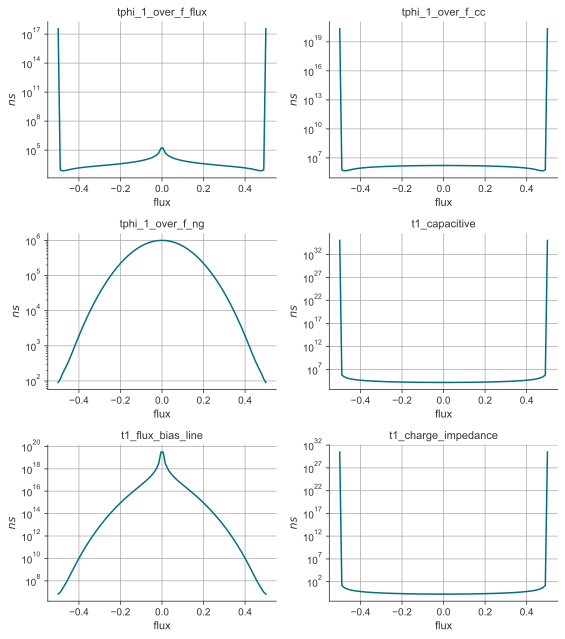

In [39]:
tune_tmon.plot_coherence_vs_paramvals(param_name='flux',
                                      param_vals=np.linspace(-0.5, 0.5, 100));

In [40]:
fluxonium_qbt = scqubits.Fluxonium.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

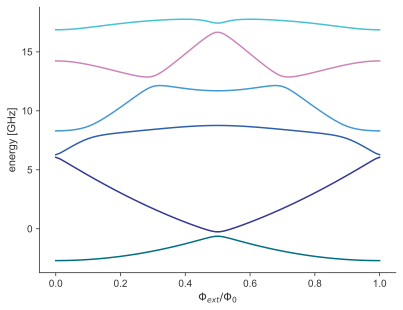

In [41]:
# define an array of flux values
fluxvals = np.linspace(0, 1, 80)
fluxonium_qbt.plot_evals_vs_paramvals(param_name='flux', param_vals=fluxvals);

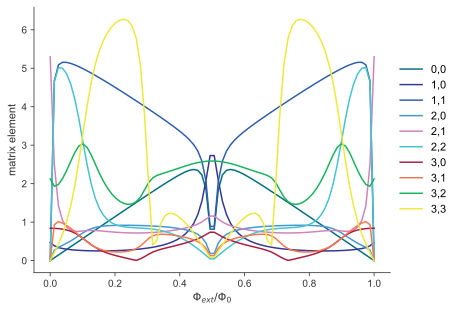

In [42]:
fluxonium_qbt.plot_matelem_vs_paramvals(operator='phi_operator', param_name='flux', param_vals=fluxvals);

## Custom Circuits

In [43]:
zp_yaml = """# zero-pi
branches:
- [JJ, 1,2, EJ=10nA, ECJ=200pF]
- [JJ, 3,4, EJ, 20GHz]
- [L, 2,3, EL=10uH]
- [L, 4,1, 0.008]
- [C, 1,3, 0.02]
- [C, 2,4, 0.02]
"""

In [44]:
zero_pi = scqubits.Circuit(zp_yaml, from_file=False)

In [45]:
zero_pi

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Circuit_1

In [46]:
import sympy as sm
import scqubits as scq

sym_hamiltonian = sm.parse_expr(
    "0.25*θ3**2 + 2.0*Q3**2 + 0.790*Q2**2 + 0.45*θ2**2 + 7.674*n1**2 + 7.674*ng1**2 - EJ*cos(θ1) + 0.5*θ2*θ3 + 1.395*Q2*n1 + 1.395*Q2*ng1 + 15.348*n1*ng1"
)
circ = scq.Circuit(
    symbolic_hamiltonian=sym_hamiltonian,
    symbolic_param_dict={"EJ": 10},
    ext_basis="harmonic",
)
circ

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Circuit_2

In [47]:
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------


In [48]:
# Let's start by defining a fluxonium
inp_yaml = """
branches:
- [JJ, 1, 2, 4, 0.5]
- [L, 1, 2, 1.3]
- [C, 1, 2, 2]
"""
circ = scq.Circuit(inp_yaml, from_file=False, use_dynamic_flux_grouping=True, ext_basis="discretized")
circ.cutoff_ext_1 = 100
circ.Φ1 = 0.5

# defining Hierarchical diagonalization to limit to the lowest 10 levels
# Hierarchical diagonalization is recommended for time evolution, which generally involves large number of matrix diagonalizations.
circ.configure(system_hierarchy=[[1]], subsystem_trunc_dims=[10])
circ

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Circuit_3

In [49]:
eigs = circ.eigenvals()
eigs - eigs[0]

array([0.        , 0.1734474 , 2.36189081, 3.65328642, 5.59769016,
       7.63584593])

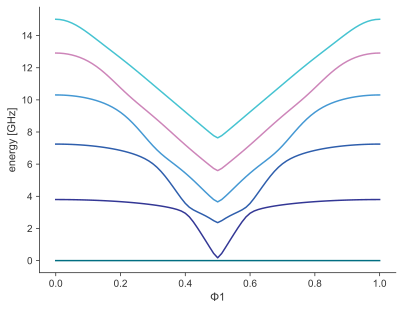

In [50]:
circ.plot_evals_vs_paramvals("Φ1", np.linspace(0, 1, 81), subtract_ground=True);

In [51]:
# Define time dependent functions for the parameters
def flux(t, args):
        freq = args["freq"]
        return 0.001*np.sin(2*np.pi*freq*t) + 0.5
# to charge drive the fluxonium, we need an extra parameter ng1. This can be added using extra_terms
def charge(t, args):
    freq = args["freq"]
    return 0.02*np.sin(2*np.pi*freq*t + np.pi/2)

In [52]:
import qutip as qt

In [53]:
# Generating necessary operators and time dependent coefficients
H_mesolve, *H_sym_ref = circ.hamiltonian_for_qutip_dynamics(free_var_func_dict={"Φ1": flux, "ng1": charge},
                                                            extra_terms="Q1*ng1",
                                                            prefactor=np.pi*2)
# H_mesolve can be used to evolve the system using qutip functions like mesolve

# ground state as initial state
eigs, evecs = circ.eigensys(evals_count=5)
wf0 = qt.Qobj(evecs[:, 0])

initial_state_proj = wf0 * wf0.dag() # to see the overlap
tf = 100 # final time in nanoseconds
freq = eigs[1] - eigs[0] # transition frequency between the first two states

# time evolve the system
result = qt.mesolve(H_mesolve, wf0, np.linspace(0, tf, 500), args={"freq": freq}, e_ops=[initial_state_proj])

In [54]:
result

<Result
  Solver: sesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.0
    preparation time: 0.00099945068359375
    run time: 0.8485701084136963
    solver: 'Schrodinger Evolution'
  Time interval: [0.0, 100.0] (500 steps)
  Number of e_ops: 1
  State not saved.
>

## Composite Systems

In [55]:
tmon1 = scq.Transmon(
    EJ=40.0,
    EC=0.2,
    ng=0.3,
    ncut=40,
    truncated_dim=4     # after diagonalization, we will keep levels 0, 1, 2, and 3
)

tmon2 = scq.Transmon(
    EJ=15.0,
    EC=0.15,
    ng=0.0,
    ncut=30,
    truncated_dim=4
)

resonator = scq.Oscillator(
    E_osc=4.5,
    truncated_dim=4  # up to 3 photons (0,1,2,3)
)

In [56]:
g = 0.1
hilbertspace = scq.HilbertSpace.create()

Container(children=[Card(children=[CardTitle(children=['Create Hilbert Space'], layout=None), Container(childr…

In [57]:
hilbertspace = scq.HilbertSpace([tmon1, tmon2, resonator])
print(hilbertspace)

HilbertSpace:  subsystems
-------------------------

Transmon------------| [Transmon_6]
                    | EJ: 40.0
                    | EC: 0.2
                    | ng: 0.3
                    | ncut: 40
                    | truncated_dim: 4
                    |
                    | dim: 81


Transmon------------| [Transmon_7]
                    | EJ: 15.0
                    | EC: 0.15
                    | ng: 0.0
                    | ncut: 30
                    | truncated_dim: 4
                    |
                    | dim: 61


Oscillator----------| [Oscillator_1]
                    | E_osc: 4.5
                    | l_osc: None
                    | truncated_dim: 4
                    |
                    | dim: 4




## Data

In [58]:
import numpy as np
import scqubits as scq

tmon = scq.Transmon(
    EJ=15.0,
    EC=0.3,
    ng=0.0,
    ncut=30
)

In [59]:
evals, evecs = tmon.eigensys(evals_count=4)
print(evals)

[-12.07703386  -6.39445819  -1.05664942   3.89594699]


In [60]:
specdata = tmon.eigensys(evals_count=4, return_spectrumdata=True)
specdata

In [61]:
m_stored = tmon.matrixelement_table(operator='n_operator', return_datastore=True)
m_stored.matrixelem_table

array([[-1.93485286e-16, -1.08780080e+00,  8.81680209e-17,
        -3.95057287e-02,  2.26744050e-17,  3.24570806e-03],
       [-1.08780080e+00,  5.36401341e-17,  1.49027312e+00,
         4.15200387e-18, -8.66090220e-02, -9.89125073e-17],
       [ 9.17333227e-17,  1.49027312e+00, -4.17844147e-17,
         1.75524483e+00,  2.35465681e-17, -1.51360095e-01],
       [-3.95057287e-02, -1.06802060e-16,  1.75524483e+00,
        -3.11273629e-16, -1.92581364e+00,  7.86953701e-17],
       [ 5.01955147e-17, -8.66090220e-02, -4.85751718e-18,
        -1.92581364e+00, -2.04728082e-16,  1.95455333e+00],
       [ 3.24570806e-03, -1.00437564e-16, -1.51360095e-01,
         7.11167537e-17,  1.95455333e+00, -2.27158756e-16]])

In [62]:
specdata.filewrite('test.h5')
new_specdata = scq.read('test.h5')

new_specdata.energy_table

array([-12.07703386,  -6.39445819,  -1.05664942,   3.89594699])